
# Project title: Medical Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset analyzed was gotten from Kaggle. It collected information from 100k medical appointments in Brazil and is focused on the question of whether or not patients were present or not on their appointment date. A number of characteristics about the patient were included in each row.
a)‘ScheduledDay’ tells us on what day the patient set up their appointments.
b)‘Neighborhood’ indicates the location of the hospital.
c)‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
d)'PatientId': The ID of each patient.
e)'AppointmentID': The ID of each appointment.
f)'Gender': The gender of each patient.
g)'Age': The age of each patient.
h)'Hipertension': It indicates wether the patient suffers from Hipertension or not.
i)'Diabetes': It indicates wether the patient suffers from Diabetes or not.
j)'SMS_received': It indicates wether the patient received SMS or not.
k)'No-show': It indicates wether the patient showed up for the appointment or not.

In [1]:
# import all the packages I will be using for this investogation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
#perform an operation to Load data and print out the first 5 lines. 

df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#Perform an operation to get general informations about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
#Perform an operation to get more statistical informations about dataset

df.describe()

#findings
#An irregularity was found in the age which is not obtainable (-1);less than 0. 0year. 
#Column names in Capital letters
#some column names not properly spelt

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
#Perform an operation to get the number of rows and columns contained in the dataset

sample_size,columns_size = df.shape
print(f'The dataset has {sample_size}-samples/rows and {columns_size}-columns')

The dataset has 110527-samples/rows and 14-columns


In [6]:
#Perform an operation to find the number of unique values contained in the dataset

df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
#Perform an operation to display rows that are duplicated as true

sum(df.duplicated())

0

In [8]:
#Perform an operation to check for null values within the dataset
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:
#perform an operation to view the statistical description of our dataset from another angle

df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708887e+01,2.311020e+01,-1.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [10]:
#Perform an operation to print out the last 5 lines.
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


# Data findings and appropropriate cleaning to be carried out

a)An irregularity was found in the age which is not obtainable (-1);less than 0. 0year.
b)Column names displayed in Capital letters which can be confusing. 
c)the column 'no-show' is a bit confusing to data readers and will be modified to 'showed'
d)some column names are not properly spelt, hence should be corrected and renamed.
e)perform an operation to get the difference or date gap when someone is scheduled and the particular appointment day
f)perform an operation to get the particular dates from the Appointment Days and Scheduled Days,excluding the time for detailed analysis
g)perform an operation to convert the integer weekday to string

In [11]:
#perform an operation to check the unique values of the column name 'Gender'

df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [12]:
#perfom an operation to check the number of times each age ocurred

A = df.groupby('Age')['Age'].count()
A.head(30)

Age
-1        1
 0     3539
 1     2273
 2     1618
 3     1513
 4     1299
 5     1489
 6     1521
 7     1427
 8     1424
 9     1372
 10    1274
 11    1195
 12    1092
 13    1103
 14    1118
 15    1211
 16    1402
 17    1509
 18    1487
 19    1545
 20    1437
 21    1452
 22    1376
 23    1349
 24    1242
 25    1332
 26    1283
 27    1377
 28    1448
Name: Age, dtype: int64

In [13]:
#query the irregualar age (-1) in a bid to correct it

df.query('Age < 0') 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [14]:
#Perform an operation to drop the irregular age column since it just 1

df.drop(df.query('Age < 0').index,inplace=True)

In [15]:
#A quick look to see if my changes have been effected

df.describe()

#good job!

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [16]:
#perform an operation to convert ScheduledDay to datetime in other to make our work easier

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [17]:
#perform an operation to convert AppointmentDay to datetime in other to make our work easier

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [18]:
#check changes

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [19]:
#perform an operation to see the data types of each columns or features

df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [21]:
# let's rename the Hipertension, Hancap, and No-show columns.

df.rename(columns={'Hipertension' : 'Hypertension', 'Handcap' : 'Handicapped', 'No-show' : 'Showed'}, inplace=True)

In [ ]:
# let's change No to Yes and vice versa under 'Showed' column to cprrespond to the column name changed

df['Showed'] = np.where(df['Showed'] == 'No', 'yes', 'no')

# please ensure you don't run this block twice in a session/runtime as it will negate all your results

In [22]:
# let's change the column names to lower cases

df.rename(columns=lambda x: x.lower(), inplace=True)

In [24]:
#check my work
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,showed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [25]:
#perform an operation to get the difference or date gap when someone is scheduled and the particular appointment day

df['number_of_waiting_days'] = df['appointmentday'] - df['scheduledday']

In [26]:
#perform an operation to get the particular dates from the Appointment Days and Scheduled Days, and exclude the time

df['appointment_date'] = df.appointmentday.dt.date
df['scheduled_date'] = df.scheduledday.dt.date

In [27]:
#check if corrections have beeen effected
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,showed,number_of_waiting_days,appointment_date,scheduled_date
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52,2016-04-29,2016-04-29
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33,2016-04-29,2016-04-29
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56,2016-04-29,2016-04-29
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1 days +06:30:29,2016-04-29,2016-04-29
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37,2016-04-29,2016-04-29


In [28]:
#perform an operation to get the particular day of the week that the appointment was fixed,

df['appointment_day_name'] = df.appointmentday.dt.weekday

In [29]:
#perform an operation to convert the integer weekday to string

mapper = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday'}
df['appointment_day_name'] = df['appointment_day_name'].map(mapper)

In [30]:
#prform an operation to check if changes have been aadded

df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,showed,number_of_waiting_days,appointment_date,scheduled_date,appointment_day_name
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52,2016-04-29,2016-04-29,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33,2016-04-29,2016-04-29,Friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56,2016-04-29,2016-04-29,Friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1 days +06:30:29,2016-04-29,2016-04-29,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37,2016-04-29,2016-04-29,Friday


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?)¶

### First lets consider the factor 'gender'¶

### Question 2; How many patients are present in the dataset and does the statistics affect the number of times they were present for their appointment?

C:\Users\sharo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


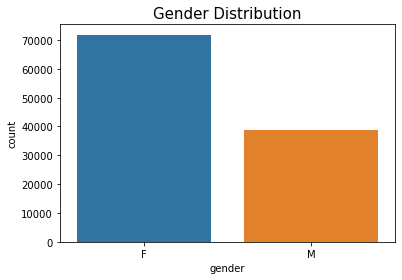

In [31]:
#perform an operation to check to check the gender distribution

plt.figure(figsize=(6,4))
sns.countplot(df['gender'])
plt.title('Gender Distribution', fontsize=15)
plt.show();

In [32]:
# let's get the value count of each gender variable in a data frame

pd.DataFrame(df['gender'].value_counts())

,gender
F,71839
M,38687


In [34]:
# let's get the percentage of each gender value count

pd.DataFrame(df['gender'].value_counts(normalize=True)*100)

,gender
F,64.997376
M,35.002624


### Summary on Gender

The sample have a total number of 62298 patients; 64.99% females and 35% males. The patient and gender data set numbers are almost the same, stating there is an even number of appointments distributed between both gender of patients in the dataset. From the statistics; it is clear gender do not affect the number of patients that will be present for their appointments, nevertheless females are likely to be more absent than males.

### Considering the factor 'appointment_date'

C:\Users\sharo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


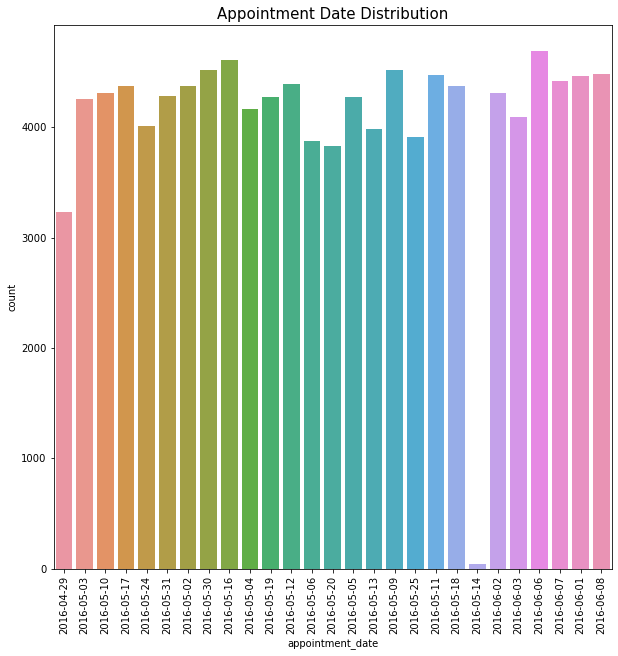

In [38]:
#perform an operation using count plot to check the appointment date distribution

plt.figure(figsize=(10,10))
sns.countplot(df['appointment_date'])
plt.title('Appointment Date Distribution', fontsize=15)
plt.xticks(rotation=90)
plt.show()

C:\Users\sharo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


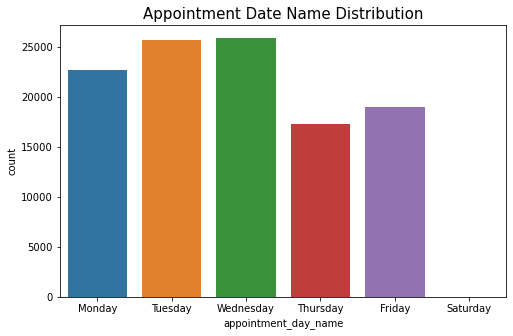

In [36]:
#perform an operation to use count plot to check the appointment day name distribution

plt.figure(figsize=(8,5))
sns.countplot(df['appointment_day_name'], 
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.title('Appointment Date Name Distribution', fontsize=15)
plt.show();

In [39]:
#perform an operation to check the value count of each appointment-day _name variable in a data frame

pd.DataFrame(df['appointment_day_name'].value_counts())

,appointment_day_name
Wednesday,25867
Tuesday,25640
Monday,22714
Friday,19019
Thursday,17247
Saturday,39


In [40]:
#perform an operation to check the percentage of each of the appointment_day _name value count

pd.DataFrame(df['appointment_day_name'].value_counts(normalize=True)*100)

,appointment_day_name
Wednesday,23.403543
Tuesday,23.198162
Monday,20.550821
Friday,17.207716
Thursday,15.604473
Saturday,0.035286


### Summary of appointment_date

More appointments were fixed on Wednesdays while Saturdays were the least

Also, appointments were fixed more during the weekdays than the weekends.Considering this statistics; it will be best to fix appointment dates during the weekdays than weekends.

### Considering the factor 'sms_distribution'

C:\Users\sharo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


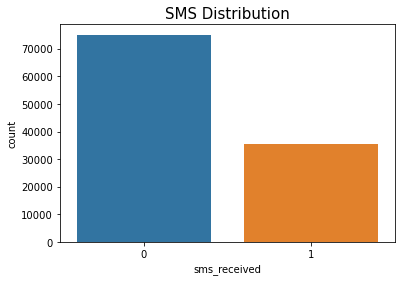

In [41]:
#perform an operation to check the distributon of sms_received among the patients

plt.figure(figsize =(6,4))
sns.countplot(df['sms_received'])
plt.title('SMS Distribution', fontsize=15)
plt.show()

In [42]:
#perform an operation to check the value count of sms received in a data frame

pd.DataFrame(df['sms_received'].value_counts())

,sms_received
0,75044
1,35482


In [43]:
#perform an operation to show the percentage of sms_received value count

pd.DataFrame(df['sms_received'].value_counts(normalize=True)*100)

,sms_received
0,67.897146
1,32.102854


### Summary of sms_received

67.90%(75044) did not receive sms while 32.10%(35482) received sms. This statistics shows that sms_distribution will greatly affect the number of patients that will show up on their appointment date, as a greater majority did not receive sms.

### Considering the factor 'patientid'

In [44]:
#Perform an operation to get the statistics of the patientd

unique_patientid = df.patientid.nunique()
print(f"This sample has {unique_patientid} patients")

This sample has 62298 patients


### Summary on patientid
a)The sample has 62298 patients. The patientid does not affect the number of patients that will show up on their appointment date.

### Considering the factor 'diabetes'

Does a patient suffering from Diabetes contributes to the patient not showing up or not?

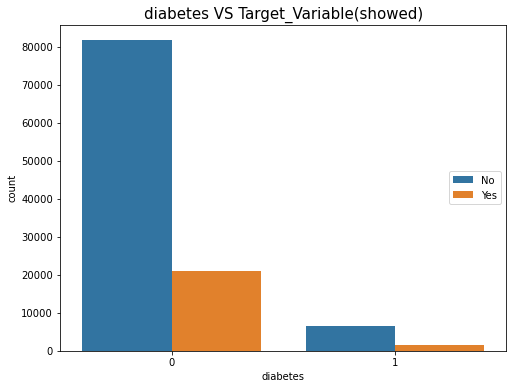

In [46]:
#perform an operation to compare how patients who suffered from diabetes showed up to the patients who are not suffering from diabetes

plt.figure(figsize=(8,6))
sns.countplot(x='diabetes', hue='showed', data=df)
plt.legend(loc='right')
plt.title('diabetes VS Target_Variable(showed)', fontsize = 15)
plt.show()

In [47]:
#perform an operation using groupby to compare diabetes and showed value counts

pd.DataFrame(df.groupby('diabetes')['showed'].value_counts())

showed
diabetes showed        
0        No       81694
         Yes      20889
1        No        6513
         Yes       1430

In [48]:
#perform an operation to derive the percentage

pd.DataFrame(df.groupby('diabetes')['showed'].value_counts(normalize=True)*100)

showed
diabetes showed           
0        No      79.636977
         Yes     20.363023
1        No      81.996727
         Yes     18.003273

### Summary on diabetes
The patients that suffered from diabetes had the highest percentage (81.99%) of people that showed up for their appointments than the number of people that did not have diabetes, which were (79.64%).

In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295

<a id='conclusions'></a>
## Conclusions

The dataset has 110527 medical appointments samples of 62298 patients. Judging from the statistics, there is a great possibility that each patient is likely to have multiple appointment records in the dataset. The data gotten further shows that the number of times a patient is given appointments correlates positively to the number of times he is present for the appointment, which draws a conclusion that patients showed up approximately 80% and failed to show up 20% of the times they were given appointments.

From the statistical findings, More appointments were fixed on Wednesdays while Saturdays were the least. Also, appointments were fixed more during the weekdays than the weekends.Considering this statistics; it will be best to fix appointment dates during the weekdays than weekends.

From the statistical findings, 67.90%(75044) did not receive sms while 32.10%(35482) received sms. This statistics shows that sms_distribution will greatly affect the number of patients that will show up on their appointment date, as a greater majority did not receive sms which is very capable of affecting the number of patients that will show up.

The analyzed dataset shows a total of 62,298 patients,64.99% females and 35% males .The patient and gender data set numbers are almost the same, stating there is an even number of appointments distributed between both gender of patients in the dataset. From the statistics; it is clear gender do not affect the number of patients that will be present for their appointments, nevertheless females are likely to be more absent than males.

Limitations
a)An irregularity was found in the age which is not obtainable (-1);less than 0. 0year.
b) Very little insight from the neighbourhood feature and patientid